<a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/26833433/82952157-51b7db00-9f5d-11ea-8f4b-dda1ffecf992.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

# Setup

Clone repo, install dependencies, `%cd` into `./yolov5` folder and check GPU.

In [35]:


import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.7.0 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


# 1. Inference

Run inference with a pretrained checkpoint on contents of `/inference/images` folder. Models are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).

In [36]:
import pandas as pd
df = pd.read_csv('../datasets/coolingTowers_negsamples/val.csv')
df[df.tower_present >= 1].head(10)

,Unnamed: 0,file,tower_present,x_offset,y_offset,chimney_pres,asset,directory,crop_size,overlay,crs,transform
26,477,acdncaqmadtyrg2dm4qignf95v7y4ze1_b2_crop_0012.npy,2,452,452,0,acdncaqmadtyrg2dm4qignf95v7y4ze1,datasets/coolingTowers256,256,30,EPSG:32644,"[10.0, 0.0, 720900.0, 0.0, -10.0, 2429940.0, 0..."
37,6968,acdncaqmadtyrg2dm4qignf95v7y4ze1_crop_0012.npy,2,452,452,0,acdncaqmadtyrg2dm4qignf95v7y4ze1,datasets/coolingTowers256,256,30,EPSG:32644,"[10.0, 0.0, 720600.0, 0.0, -10.0, 2429940.0, 0..."
48,4432,pw_chn_00047_b2_crop_0005.npy,2,226,226,0,pw_chn_00047,datasets/coolingTowers256,256,30,EPSG:32650,"[10.0, 0.0, 564540.0, 0.0, -10.0, 4139280.0, 0..."
49,4436,pw_chn_00047_b2_crop_0009.npy,2,226,452,0,pw_chn_00047,datasets/coolingTowers256,256,30,EPSG:32650,"[10.0, 0.0, 564540.0, 0.0, -10.0, 4139280.0, 0..."
70,12703,pw_chn_00047_crop_0035.npy,4,678,904,0,pw_chn_00047,datasets/coolingTowers256,256,30,EPSG:32650,"[10.0, 0.0, 559860.0, 0.0, -10.0, 4144860.0, 0..."
71,12704,pw_chn_00047_crop_0036.npy,2,904,904,0,pw_chn_00047,datasets/coolingTowers256,256,30,EPSG:32650,"[10.0, 0.0, 559860.0, 0.0, -10.0, 4144860.0, 0..."
95,1874,pw_chn_00069_b2_crop_0009.npy,3,226,452,0,pw_chn_00069,datasets/coolingTowers256,256,30,EPSG:32648,"[10.0, 0.0, 657000.0, 0.0, -10.0, 3935880.0, 0..."
96,1875,pw_chn_00069_b2_crop_0010.npy,3,452,452,0,pw_chn_00069,datasets/coolingTowers256,256,30,EPSG:32648,"[10.0, 0.0, 657000.0, 0.0, -10.0, 3935880.0, 0..."
118,20566,pw_chn_00069_crop_0039.npy,4,678,904,0,pw_chn_00069,datasets/coolingTowers256,256,30,EPSG:32648,"[10.0, 0.0, 652440.0, 0.0, -10.0, 3941640.0, 0..."
119,20567,pw_chn_00069_crop_0040.npy,4,904,904,0,pw_chn_00069,datasets/coolingTowers256,256,30,EPSG:32648,"[10.0, 0.0, 652440.0, 0.0, -10.0, 3941640.0, 0..."


In [37]:
!python detect.py --weights runs/exp16/weights/best.pt  --conf 0.3 --source ../datasets/coolingTowers_negsamples//images/val
Image(filename='inference/output/000095.jpg', width=700)

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.3, device='', img_size=640, iou_thres=0.45, save_conf=False, save_dir='inference/output', save_txt=False, source='../datasets/coolingTowers_negsamples//images/val', update=False, view_img=False, weights=['runs/exp16/weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Traceback (most recent call last):
  File "detect.py", line 174, in <module>
    detect()
  File "detect.py", line 34, in detect
    model = attempt_load(weights, map_location=device)  # load FP32 model
  File "/home/m.esguerra/yolov5/models/experimental.py", line 137, in attempt_load
    model.append(torch.load(w, map_location=map_location)['model'].float().fuse().eval())  # load FP32 model
  File "/home/m.esguerra/.pyenv/versions/finderenv/lib/python3.7/site-packages/torch/serialization.py", line 594, in load
    return _load(opened_zipfile, map_location, pickle_module, **pickle_load_args)
  File "/home

FileNotFoundError: [Errno 2] No such file or directory: 'inference/output/000095.jpg'

Inference can be run on a variety of sources: images, videos, directories, webcams, rtsp and http streams as shown in the example below.

# 2. Test
Test a model on COCO val or test-dev dataset to determine trained accuracy. Models are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

### 2.1 val2017
Download COCO val 2017 dataset, 1GB, 5000 images, and test model accuracy.

In [ ]:
# Download COCO val2017
gdrive_download('1Y6Kou6kEB0ZEMCCpJSKStCor4KAReE43','coco2017val.zip')  # val2017 dataset
!mv ./coco ../  # move folder alongside /yolov5

In [ ]:
# Run YOLOv5x on COCO val2017
!python test.py --weights yolov5x.pt --data coco.yaml --img 672

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/coco.yaml', device='', img_size=672, iou_thres=0.65, merge=False, save_json=True, single_cls=False, task='val', verbose=False, weights=['yolov5x.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Fusing layers... Model Summary: 284 layers, 8.89222e+07 parameters, 8.89222e+07 gradients
Scanning labels ../coco/labels/val2017.cache (4952 found, 0 missing, 48 empty, 0 duplicate, for 5000 images): 100% 5000/5000 [00:00<00:00, 22899.17it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 157/157 [02:38<00:00,  1.01s/it]
                 all       5e+03    3.63e+04       0.426       0.746        0.66       0.469
Speed: 22.3/1.7/24.0 ms inference/NMS/total per 672x672 image at batch-size 32

COCO mAP with pycocotools... saving detections_val2017__results.json...
loading annotations into memory...
Done (t=0.41s)
creating index...
index cre

### 2.2 test-dev2017
Download COCO test2017 dataset, 7GB, 40,000 images, to test model accuracy on test-dev set, 20,000 images. Results are saved to a `*.json` file which can be submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
gdrive_download('1cXZR_ckHki6nddOmcysCuuJFM--T-Q6L','coco2017labels.zip')  # annotations
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
!mv ./test2017 ./coco/images && mv ./coco ../  # move images into /coco and move /coco alongside /yolov5

In [8]:
!python test.py --weights runs/exp11/weights/best.pt --batch-size 16 --save-txt  --data coolingTowers250.yaml  --save-dir runs/testexp11


Namespace(augment=False, batch_size=16, conf_thres=0.001, data='./data/coolingTowers250.yaml', device='', img_size=640, iou_thres=0.65, save_conf=False, save_dir='runs/testexp11', save_json=False, save_txt=True, single_cls=False, task='val', verbose=False, weights=['runs/exp11/weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Fusing layers... 
Model Summary: 284 layers, 8.83906e+07 parameters, 0 gradients
Scanning labels ../datasets/coolingTowers250/labels/val.cache (366 found, 0 missing, 2076 empty, 0 duplicate, for 2442 images): 2442it [00:00, 130507.51it/s]
               Class      Images     Targets           P           R      mAP@.5
                 all    2.44e+03         531       0.601       0.898       0.819       0.505
Speed: 27.4/1.0/28.4 ms inference/NMS/total per 640x640 image at batch-size 16
Results saved to runs/testexp11


# 3. Train

Download https://www.kaggle.com/ultralytics/coco128, a small 128-image tutorial dataset, start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (actual training is much longer, around **300-1000 epochs**, depending on your dataset).

In [ ]:
# Download coco128
gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f','coco128.zip')  # coco128 dataset
!mv ./coco128 ../  # move folder alongside /yolov5

Train a YOLOv5s model on coco128 by specifying model config file `--cfg models/yolo5s.yaml`, and dataset config file `--data data/coco128.yaml`. Start training from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights ''`. Pretrained weights are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).

**All training results are saved to `runs/exp0`** for the first experiment, then `runs/exp1`, `runs/exp2` etc. for subsequent experiments.


In [ ]:
# Start tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs

In [9]:
# Train YOLOv5s on coco128 for 3 epochs
!python train.py --img 800 --batch 16 --epochs 50 --data coolingTowers128.yaml --weights yolov5l.pt

Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='', data='./data/coolingTowers128.yaml', device='', epochs=50, evolve=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[800, 800], local_rank=-1, logdir='runs/', multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5l.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
2020-11-02 14:58:44.853334: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.0/lib64:/usr/local/cuda-10.0/lib64:
2020-11-02 14:58:44.853372: I tensorflow/stream_executor/cuda/

# 4. Visualize

View `runs/exp0/train*.jpg` images to see training images, labels and augmentation effects. A **Mosaic Dataloader** is used for training (shown below), a new concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

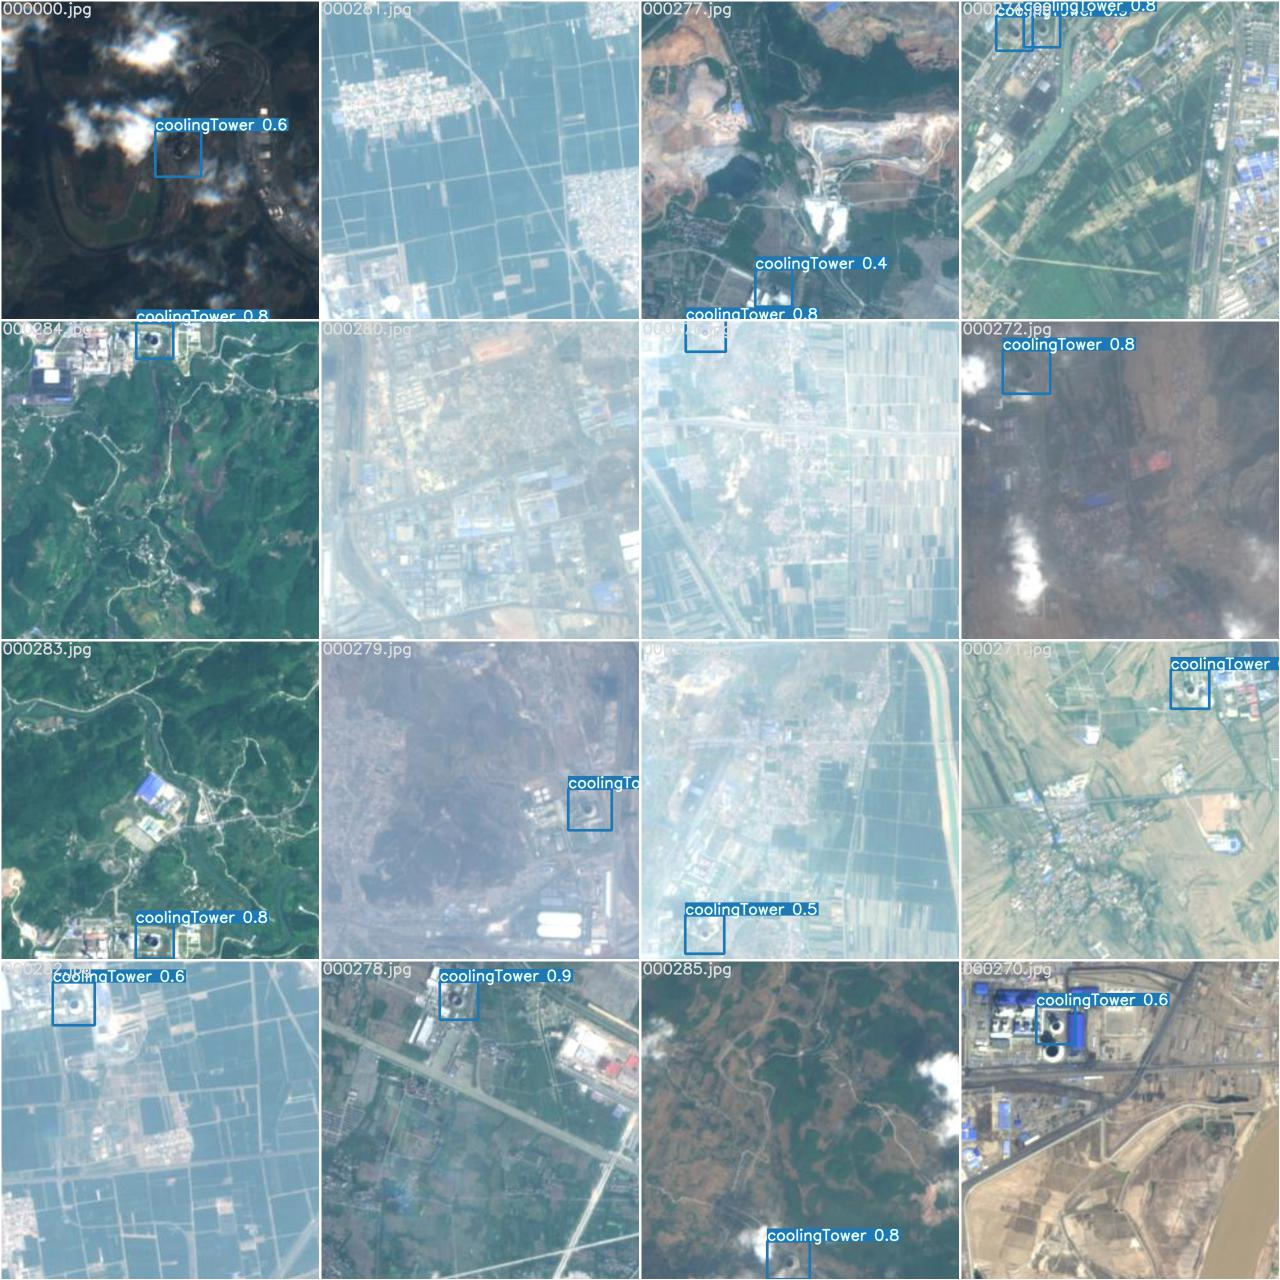

In [10]:
Image(filename='runs/exp0/test_batch0_pred.jpg', width=900)  # view augmented training mosaics

View `test_batch0_gt.jpg` to see test batch 0 *ground truth* labels.

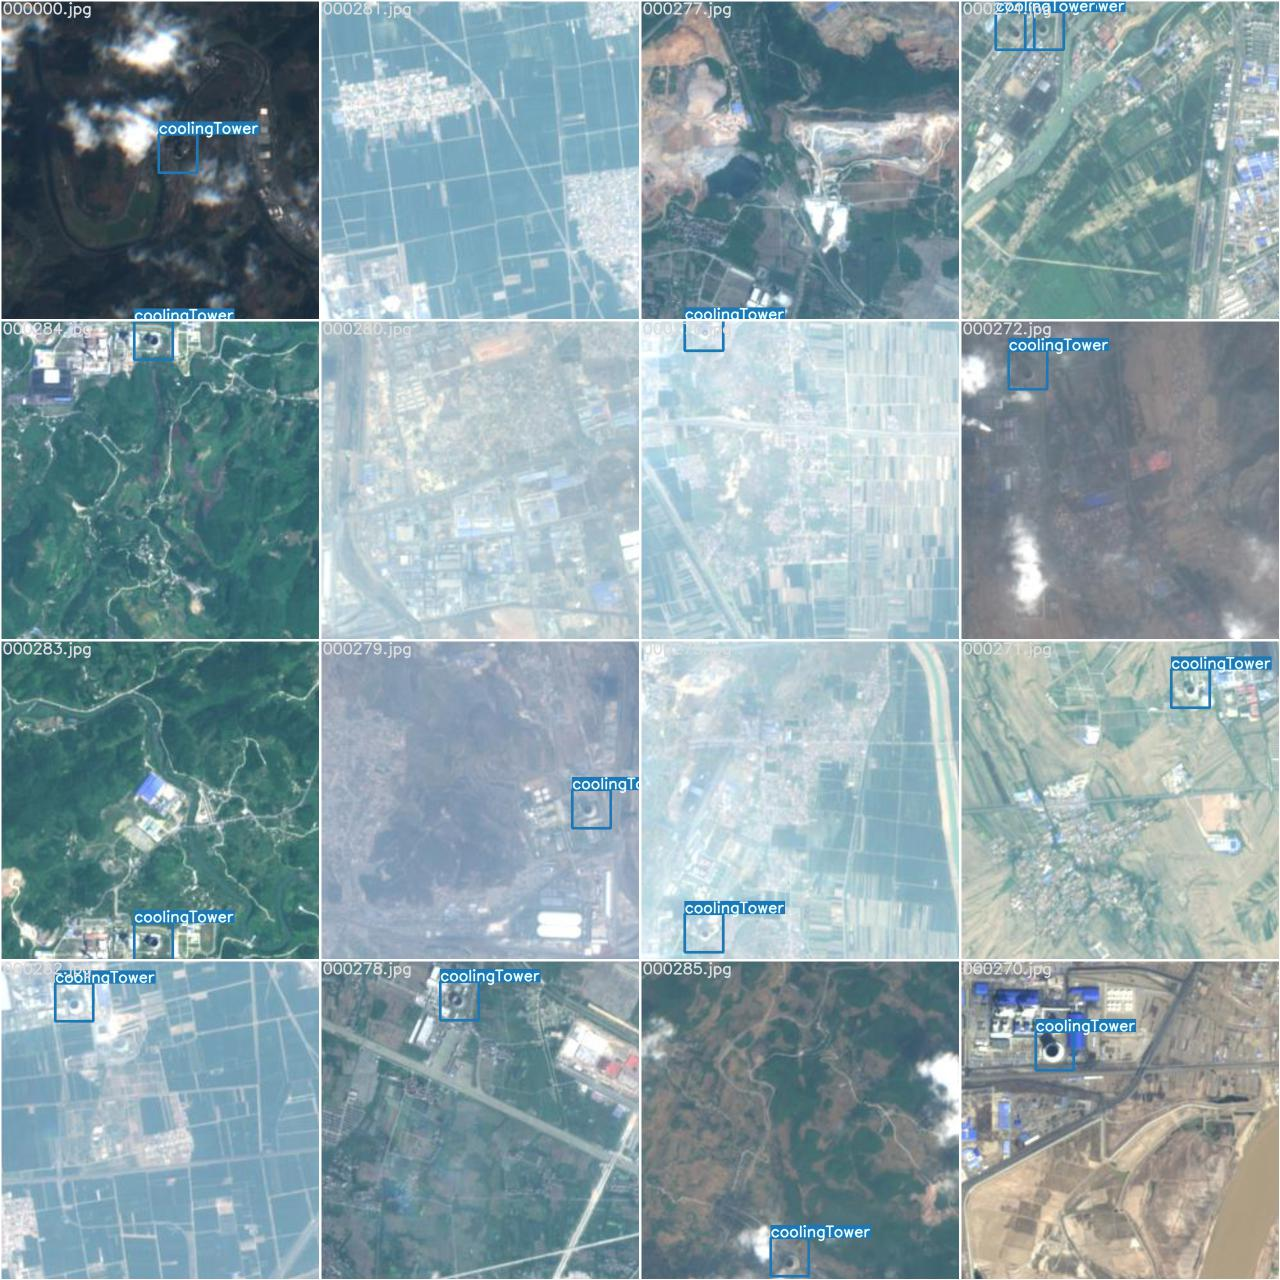

In [12]:
Image(filename='runs/exp0/test_batch0_gt.jpg', width=900)  # view test image labels

View `test_batch0_pred.jpg` to see test batch 0 *predictions*.

Training losses and performance metrics are saved to Tensorboard and also to a `runs/exp0/results.txt` logfile. `results.txt` is plotted as `results.png` after training completes. Partially completed `results.txt` files can be plotted with `from utils.general import plot_results; plot_results()`. Here we show YOLOv5s trained on coco128 to 300 epochs, starting from scratch (blue), and from pretrained `yolov5s.pt` (orange).

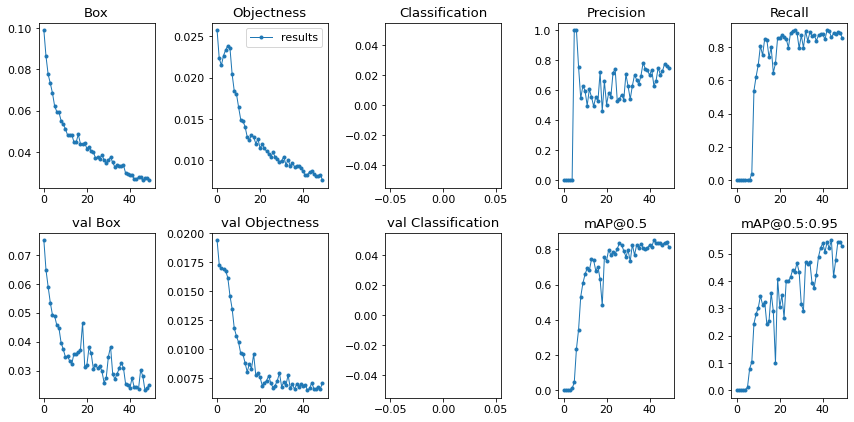

In [14]:
from utils.general import plot_results; plot_results(save_dir='runs/exp0/')  # plot results.txt files as results.png